In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import astropy.units as u
from sunpy.time import TimeRange
import time
import sys
import os

import datetime as dt
import matplotlib.dates as mdates
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib import gridspec,transforms

mpl.use('nbagg')

In [2]:
sys.path.insert(1, '../../20201013_jupiter/')
from sk import LofarRaw
import ed_flagger as edf
import ilofar_ueds_rfi as ued
import waterfall as wf

In [4]:
filename = '../udpoutput/uranus-stokesVectors_0_2020-12-15T20:04:00' #0 is I and 1 is V I assume
#sV = '../udpoutput/uranus-stokesVectors_1_2020-12-15T20:04:00_19629670898060'
#off_fname = '../udpoutput/offsource-stokesVectors_0_2020-12-15T20:04:00_19629670898060'
frange = [15,30]
sbs = np.arange(76,198)
obs_mode = 3
time_len_mins = 176.
trange = TimeRange(filename.split('_')[-1], time_len_mins*u.min)
xlabel = "Time on {} (UTC)".format(filename.split('_')[-2].split('T')[0])
ylabel = "Frequency (MHz)"
title = filename.split('/')[2]
no_sbs = 78
nsplit = 10

In [6]:
#off-beam
rawdata = LofarRaw(fname=filename, sbs=sbs, obs_mode=obs_mode, frange=frange)
rawdata.data = rawdata.data[:,:no_sbs]

Time to read data: 0.000888s



In [7]:
freqs_sbs = rawdata.sb_to_f(sbs[:78], 3)

In [8]:
freqs_sbs[1] - freqs_sbs[0]

<Quantity 0.1953125 MHz>

In [9]:
raw_chunk = ued.data_chunker(rawdata.data, nsplit)
tchunks = trange.split(nsplit)

In [17]:
raw_chunk[0].max(), raw_chunk[1].min()

(16195865.0, 0.0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([12000000., 12010000., 12020000., 12030000., 12040000., 12050000.,
        12060000., 12070000., 12080000., 12090000., 12100000., 12110000.,
        12120000., 12130000., 12140000., 12150000., 12160000., 12170000.,
        12180000., 12190000., 12200000., 12210000., 12220000., 12230000.,
        12240000., 12250000., 12260000., 12270000., 12280000., 12290000.,
        12300000., 12310000., 12320000., 12330000., 12340000., 12350000.,
        12360000., 12370000., 12380000., 12390000., 12400000., 12410000.,
        12420000., 12430000., 12

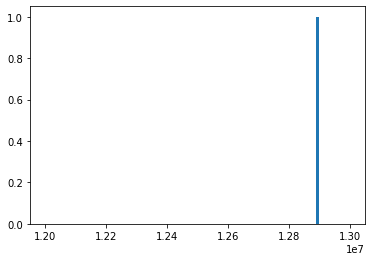

In [24]:
plt.hist(raw_chunk[0].shape, bins=100, range=(int(1.2e7), int(1.3e7)))

In [14]:
%matplotlib inline

In [29]:
ued.plot_data(raw_chunk[0], np.nansum(raw_chunk[0].T, axis=0), np.nansum(raw_chunk[0].T, axis=1), [0, raw_chunk[0].shape[0]], [freqs_sbs[0], freqs_sbs[-1]], xlabel, ylabel, 'test', 'Stokes I - Uranus')


Plotting...



ValueError: Date ordinal 12890627.0 converts to 37263-05-04T00:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

(array([1.97000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.00000000e+00, 1.35000000e+02, 2.35200000e+03,
        2.08830000e+04, 1.27226000e+05, 5.63936000e+05, 1.91827300e+06,
        5.21163000e+06, 1.17263630e+07, 2.24559800e+07, 3.73925270e+07,
        5.50958780e+07, 7.29741050e+07, 8.80492940e+07, 9.77208580e+07,
        1.00761594e+08, 9.73117590e+07, 8.86189120e+07, 7.65791790e+07,
        6.31378020e+07, 4.99244120e+07, 3.80226770e+07, 2.80123100e+07,
        2.00383750e+07, 1.39596030e+07, 9.52473200e+06, 6.39228400e+06,
        4.23638500e+06, 2.80609100e+06, 1.86861000e+06, 1.26526300e+06,
        8.87808000e+05, 6.50819000e+05, 5.03981000e+05, 4.10404000e+05,
        3.49045000e+05, 3.10418000e+05, 2.80939000e+05, 2.58668000e+05,
        2.40918000e+05, 2.26866000e+05, 2.14661000e+05, 2.02933000e+05,
        1.90397000e+05, 1.81442000e+05, 1.72025000e+05, 1.63318000e+05,
        1.54264000e+05, 1.46784000e+05, 1.39479000e+05, 1.319490

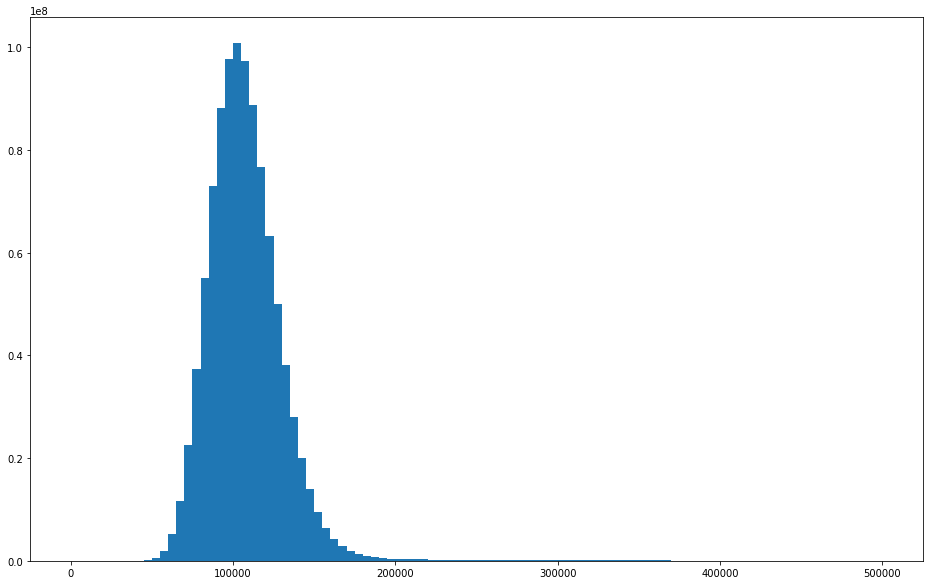

In [37]:
fig = plt.figure(figsize=(16,10))
plt.hist(raw_chunk[5].flatten(), range=(0,5e5), bins=100)